Common statements (run before anything else, then all others can be run independently)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.options.mode.copy_on_write = True

# Define import filepath
inPath = os.getcwd() + "\\Analysis-Outputs"

# Define plot out filepath
plotOutPath = os.getcwd() + "\\Analysis-Plots"

Combine High-Level Results DFs

In [4]:
highLevelDFs = []
for year in [2024, 2023, 2022]:
    highLevelDFs.append(pd.read_csv(inPath + f"\\SB_{year}_DP_HighLevelResults.csv"))
highLevelDF = pd.concat(highLevelDFs)
highLevelDF.to_csv(inPath + "\\SB_2022to2024_HighLevelResults.csv")

Build plot of success for Base Double Poisson in 2024

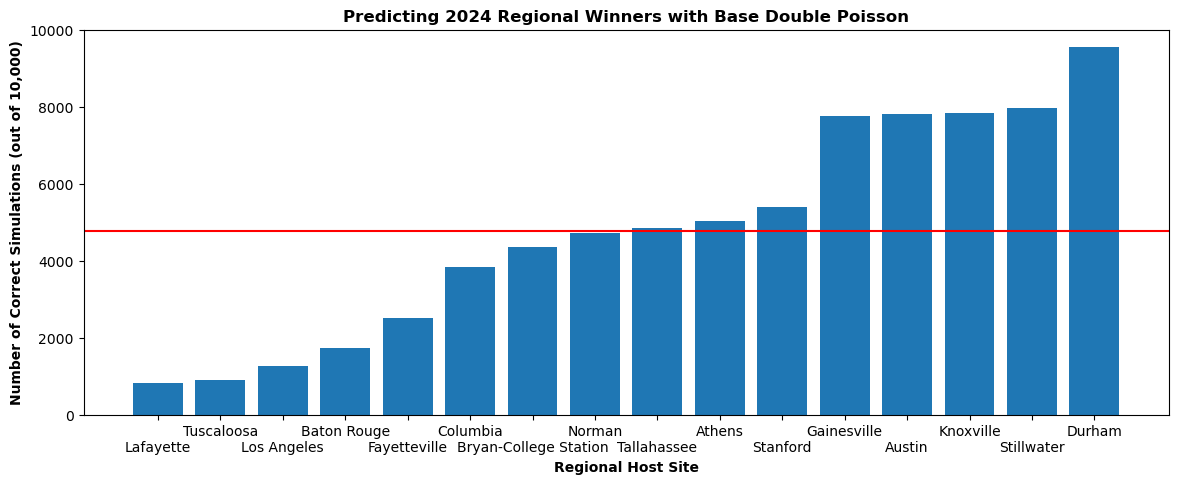

Average number correct with Base DP across all years:  5068.6875
Average number correct with Base in 2024:  4767.875


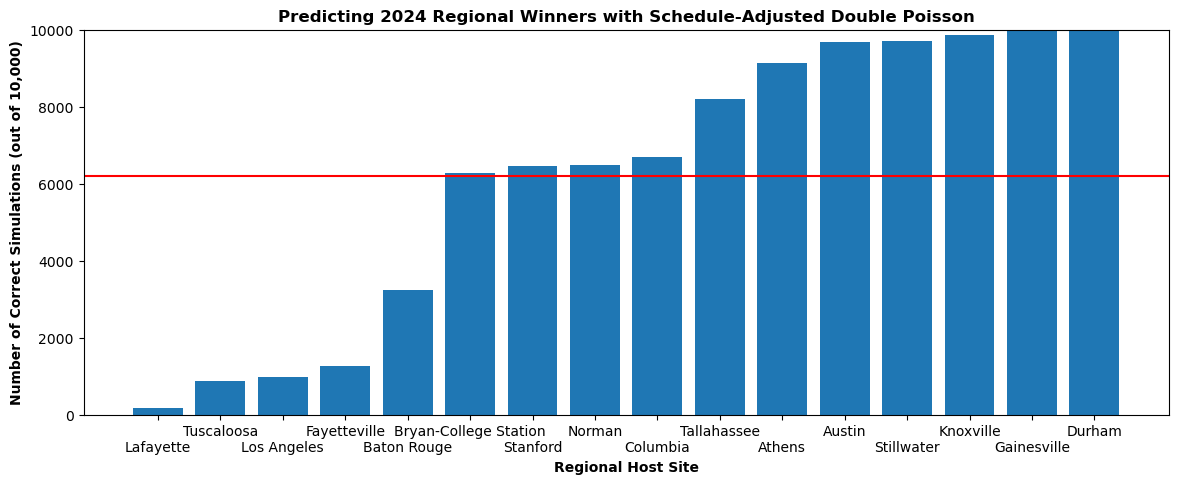

Average number correct with Schedule-Adjusted DP across all years:  6310.458333333333
Average number correct with Schedule-Adjusted in 2024:  6184.3125


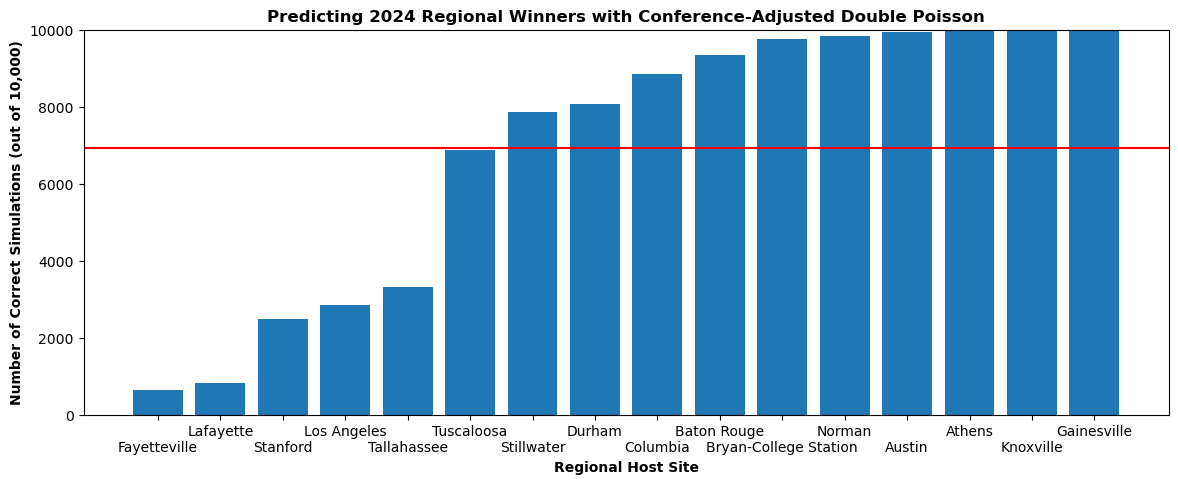

Average number correct with Conference-Adjusted DP across all years:  6505.333333333333
Average number correct with Conference-Adjusted in 2024:  6909.75


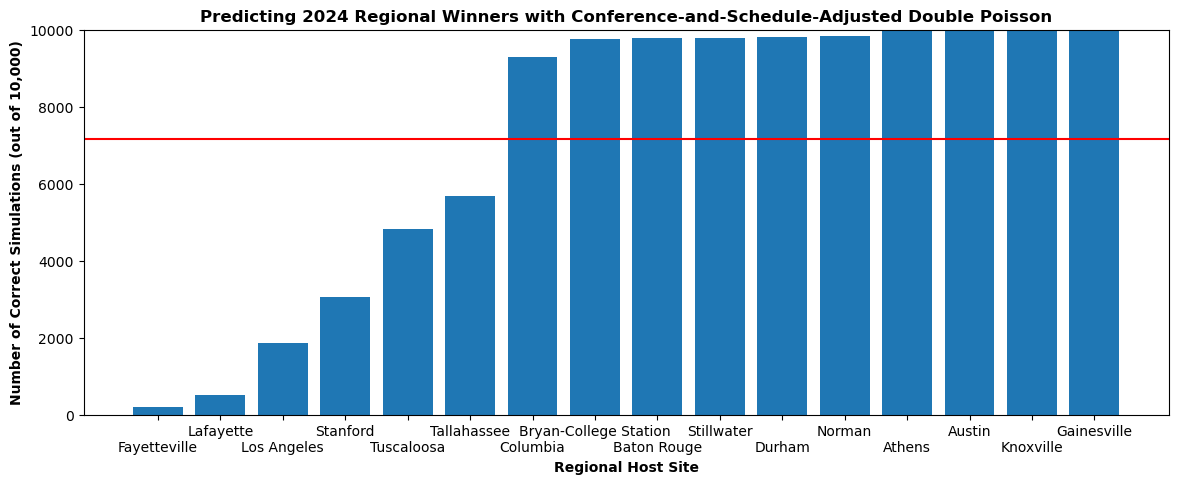

Average number correct with Conference-and-Schedule-Adjusted DP across all years:  6975.166666666667
Average number correct with Conference-and-Schedule-Adjusted in 2024:  7145.4375


In [84]:
highLevelDF = pd.read_csv(inPath + "\\SB_2022to2024_HighLevelResults.csv")
year = 2024

for (model, fullName) in [("Base", "Base"), ("SADP", "Schedule-Adjusted"),
                          ("CADP", "Conference-Adjusted"), ("CSADP", "Conference-and-Schedule-Adjusted")]:
    modelColName = f"{model}WinnerCorrect"
    orderedDF = highLevelDF[highLevelDF["RegionalYear"] == year]
    orderedDF = orderedDF[["RegionalYear", "RegionalSite", modelColName, "HostSeed"]]
    orderedDF.sort_values([modelColName], inplace=True)
    orderedDF.reset_index(inplace=True, drop=True)
    orderedDF["RegionalYearSite"] = [str(orderedDF.loc[i, "RegionalYear"]) + " " + orderedDF.loc[i, "RegionalSite"] 
                                 for i in range(len(orderedDF))]
    orderedDF["RegionalSite"] = [orderedDF.loc[i, "RegionalSite"]
                            if i % 2 == 1 else ("\n" + orderedDF.loc[i, "RegionalSite"]) for i in range(len(orderedDF))]
    fig, ax = plt.subplots(figsize=(14, 5))
    plt.bar(orderedDF["RegionalSite"], orderedDF[modelColName])
    plt.axhline(y=orderedDF[modelColName].mean(), color='r', linestyle='-', 
                label=f'Test')
    #plt.xticks(rotation=80)
    plt.title(f"Predicting {year} Regional Winners with {fullName} Double Poisson", fontweight='bold')
    plt.xlabel("Regional Host Site", fontweight='bold')
    plt.ylabel("Number of Correct Simulations (out of 10,000)", fontweight='bold')
    plt.ylim(0, 10000)
    plt.savefig(plotOutPath + f"\\24_RegionalWinners_{model}.png", bbox_inches="tight")
    plt.show()

    # Calculate mean 
    print(f"Average number correct with {fullName} DP across all years: ", highLevelDF[modelColName].mean())
    print(f"Average number correct with {fullName} in {year}: ", orderedDF[modelColName].mean())

Build Matrix for Average Number of Correct Picks By Year

In [90]:
highLevelDF = pd.read_csv(inPath + "\\SB_2022to2024_HighLevelResults.csv")
cutHighLevel = highLevelDF[["RegionalYear", "BaseWinnerCorrect", "SADPWinnerCorrect", "CADPWinnerCorrect", 
                            "CSADPWinnerCorrect"]]
print("Average Number of Correct Picks:")
display(cutHighLevel.groupby(["RegionalYear"]).mean())
print("Standard Deviation of Correct Picks:")
display(cutHighLevel.groupby(["RegionalYear"]).std())

Average Number of Correct Picks:


,BaseWinnerCorrect,SADPWinnerCorrect,CADPWinnerCorrect,CSADPWinnerCorrect
RegionalYear,,,,
2022,4940.1875,5900.3125,6020.8125,6361.8125
2023,5498.0000,6846.7500,6585.4375,7418.2500
2024,4767.8750,6184.3125,6909.7500,7145.4375


Standard Deviation of Correct Picks:


,BaseWinnerCorrect,SADPWinnerCorrect,CADPWinnerCorrect,CSADPWinnerCorrect
RegionalYear,,,,
2022,3005.008313,4027.852227,3194.438442,3970.197312
2023,2829.334881,3420.074122,3521.432927,3505.972514
2024,2822.868585,3690.830904,3572.503725,3803.364878


Determine highest conference-adjusted offensive strength and conference-adjusted defensive strength scores:

In [91]:
strengthsDF = pd.read_csv(inPath + "\\2024_DP_strengths.csv")
confStrengths = strengthsDF[["TeamConference", "CAOS", "CADV"]].groupby(["TeamConference"]).mean()
display(confStrengths.sort_values(["CAOS"]))
display(confStrengths.sort_values(["CADV"]))

,CAOS,CADV
TeamConference,,
SWAC,0.540875,1.678518
Horizon,0.615893,1.464005
MEAC,0.640600,1.584342
NEC,0.716081,1.080948
MAAC,0.741163,1.346414
Big South,0.787412,0.992897
MVC,0.794828,1.129469
Atlantic 10,0.816648,1.186873
CAA,0.822480,1.143319


,CAOS,CADV
TeamConference,,
SEC,1.655065,0.439876
Pac-12,1.365157,0.594261
Big 12,1.633747,0.678508
ACC,1.482134,0.704703
Sun Belt,1.220519,0.797316
Big Ten,1.284951,0.815527
AAC,1.032797,0.888659
Southland,0.989022,0.902822
Mountain West,1.129383,0.910157


Determine highest schedule-adjusted offensive strength and defensive vulnerability values.

In [72]:
strengthsDF = pd.read_csv(inPath + "\\2024_DP_strengths.csv")
display(strengthsDF.sort_values(["SAOS"])
display(strengthsDF.sort_values(["SADV"]))

,TeamUID,TeamConference,OffStrength,DefVulnerability,SAOS,SADV,CAOS,CADV
121,2024.SB.Lafayette,Patriot,1.763158,0.706814,0.399443,1.505438,0.853283,1.110915
60,2024.SB.DetroitMercy,Horizon,1.863636,0.843830,0.400786,1.907092,0.615893,1.464005
70,2024.SB.FDU,NEC,1.921053,0.439531,0.452828,0.941039,0.716081,1.080948
6,2024.SB.Alcorn,SWAC,2.214286,0.757725,0.475677,1.646711,0.540875,1.678518
10,2024.SB.Ark-PineBluff,SWAC,2.400000,0.493327,0.483335,1.151457,0.540875,1.678518
...,...,...,...,...,...,...,...,...
244,2024.SB.Texas,Big 12,7.962264,0.246998,1.919446,0.422658,1.633747,0.678508
182,2024.SB.Oklahoma,Big 12,8.096154,0.208343,1.961887,0.332672,1.633747,0.678508
77,2024.SB.FloridaSt,ACC,7.596491,0.453391,1.998785,0.798859,1.482134,0.704703
142,2024.SB.Miami-OH,MAC,9.145455,0.426788,2.082822,0.831260,1.086131,1.169104


,TeamUID,TeamConference,OffStrength,DefVulnerability,SAOS,SADV,CAOS,CADV
23,2024.SB.BostonU,Patriot,5.907407,0.144201,1.294444,0.296111,0.853283,1.110915
63,2024.SB.Duke,ACC,6.811321,0.206542,1.771113,0.321681,1.482134,0.704703
182,2024.SB.Oklahoma,Big 12,8.096154,0.208343,1.961887,0.332672,1.633747,0.678508
241,2024.SB.Tennessee,SEC,5.760000,0.187335,1.555018,0.340289,1.655065,0.439876
237,2024.SB.Stanford,Pac-12,4.839286,0.237797,1.234886,0.412509,1.365157,0.594261
...,...,...,...,...,...,...,...,...
265,2024.SB.UMES,MEAC,3.545455,0.810487,0.705646,1.882722,0.640600,1.584342
60,2024.SB.DetroitMercy,Horizon,1.863636,0.843830,0.400786,1.907092,0.615893,1.464005
4,2024.SB.AlabamaA&M,SWAC,3.000000,0.885722,0.561744,1.963808,0.540875,1.678518
235,2024.SB.StBonaventure,Atlantic 10,2.150000,0.976176,0.511063,2.100393,0.816648,1.186873
